In [1]:
!pip install qiskit
import qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.9 MB/s eta 0:00:00


In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2ccce5cbbc929bb7a131a2f822505cfbad5b930717341a9543c720c058230101
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
from qiskit.quantum_info import Operator
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from numpy import sqrt
#import matplotlib.pyplot as plt
import pylatexenc
import numpy as np

In [4]:
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1/sqrt(2), 1/sqrt(2)], [1/sqrt(2), -1/sqrt(2)]])
S = Operator([[1, 0], [0, 1j]])
T = Operator([[1, 0], [0, (1.0+1.0j)/sqrt(2)]])

v = Statevector([0,1])

In [5]:
print("Initial State Vector |1>:")
print(v)

Initial State Vector |1>:
Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [6]:
v = X @ v

print("\nState after applying X gate:")
print(v)


State after applying X gate:
Operator([[0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [7]:
v = Y @ v

print("\nState after applying Y gate:")
print(v)


State after applying Y gate:
Operator([[0.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))


In [8]:
v = Z @ v

print("\nState after applying Z gate:")
print(v)


State after applying Z gate:
Operator([[0.+0.j, 0.+0.j],
          [0.+0.j, 0.-1.j]],
         input_dims=(2,), output_dims=(2,))


In [9]:
v = H @ v

print("\nState after applying H gate:")
print(v)


State after applying H gate:
Operator([[0.+0.j        , 0.-0.70710678j],
          [0.+0.j        , 0.+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


In [10]:
v = S @ v

print("\nState after applying S gate:")
print(v)


State after applying S gate:
Operator([[ 0.        +0.j        ,  0.        -0.70710678j],
          [ 0.        +0.j        , -0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))


In [11]:
v = T @ v

print("\nState after applying T gate:")
print(v)


State after applying T gate:
Operator([[ 0. +0.j        ,  0. -0.70710678j],
          [ 0. +0.j        , -0.5-0.5j       ]],
         input_dims=(2,), output_dims=(2,))


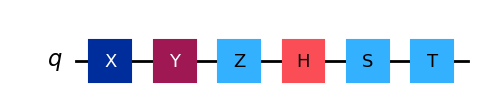

In [12]:
circuit = QuantumCircuit(1)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.h(0)
circuit.s(0)
circuit.t(0)

display(circuit.draw(output='mpl'))

In [13]:
ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[0. -0.70710678j,0.5+0.5j       ]

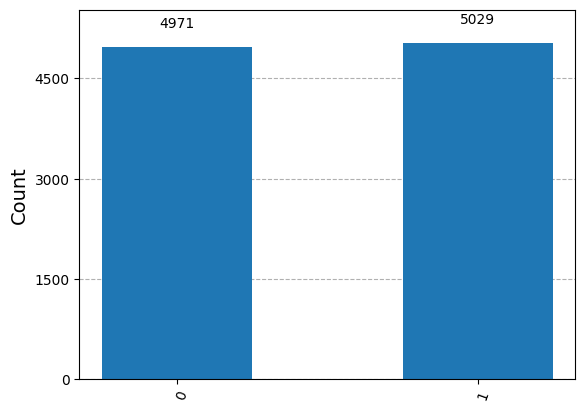

In [14]:
stats = v.sample_counts(10000)
plot_histogram(stats)

In [15]:
R = H @ S @ H

In [16]:
print("R = H * S * H matrix:")
print(R)

R = H * S * H matrix:
Operator([[0.5+0.5j, 0.5-0.5j],
          [0.5-0.5j, 0.5+0.5j]],
         input_dims=(2,), output_dims=(2,))


In [17]:
RD = np.conjugate(R).T
identity = R @ RD

In [18]:
print("\nR * R^†:")
print(identity)


R * R^†:
Operator([[1.+0.00000000e+00j, 0.-2.46519033e-32j],
          [0.+2.46519033e-32j, 1.+0.00000000e+00j]],
         input_dims=(2,), output_dims=(2,))


In [19]:
uni = np.allclose(identity, np.eye(2))
uni

True